# Where to open a Pub in NYC? where has best Pub in NYC?

student:Emma Delehanty

# Introduction
The City of New York, is the most populous city in the United States. It is diverse and is the financial capital of USA. It is multicultural. It provides lot of business opportunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the United States.
This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.
The basis of this study is to find the best location for investors to open a new pub in NYC city. Sales in the drinking place sector in the United States have steadily grown since the mid 1990's reaching 23.15 billion U.S. dollars in 2015. The sector includes bars, pubs, lounges, taverns and nightclubs as well as other drinking places that primarily sell alcoholic beverages for immediate consumption. 
The National Restaurant Association estimated that food and drink sales in U.S. bars and taverns would reach 19.9 billion U.S. dollars in 2016. This is a relatively small figure in comparison to the wider restaurant industry, for which food and drink sales were expected to rise to approximately 783 billion U.S. dollars during the same year. New York is a major metropolitan area with more than 8.4 million (Quick Facts, 2018) people living within city limits.



An area that meets the following criteria:
- A neighborhood with an average to above average total population
- Above average populations of 25–40-year-old male and female professionals
- Average to above average median net household incomes

With these criteria given by the investing group, based on previous success in other markets, the objective is to locate and recommend to the investors, the target audience, which neighborhood(s) of NYC will be the best choice to start growth plan. The information gained will assist in choosing the right location by providing data about the population of each neighborhood, in addition to other established venues present in these areas.This report explores which neighborhoods and boroughs of New York City have the most as well as the pubs. Additionally, I will attempt to answer the questions “Where should I open an pubs?” and “Where I can find best pub?”


# Data

- Data 1 : Neighborhood has a total of 5 boroughs and 306 neighborhoods which each borough as well as the the latitude and logitude coordinates of each neighborhood.
This dataset exists for free on the web. Link to the dataset is : https://geo.nyu.edu/catalog/nyu_2451_34572
- Data 2: For the below analysis we will get data from wikipedia as given below : 
   1.	New York Population 
   2.	New York City Demographics 
-https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City

-https://en.wikipedia.org/wiki/Economy_of_New_York_City 

-https://en.wikipedia.org/wiki/Portal:New_York_City 
- Data 3: we are using Foursquare API  to utilize city geographical coordinates data which will be leveraged to provision venues information for each neighborhood


In [ ]:
pip install geopy

In [1]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns
### Import important libraries
from bs4 import BeautifulSoup
import requests   # library to handle requests
import lxml       # parse the website in lxml format
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

print('Libraries imported.')
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Libraries imported.


## Getting and extracting data from wikipedia

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table', class_='wikitable sortable')

In [3]:
from IPython.display import display_html
url = str(soup.table)
display_html(url,raw=True)

Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris"
Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood"
Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Morrisania"
Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge"
Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, University Heights"
Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms"
Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights"
Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, Marble Hill, Riverdale, Spuyten Duyvil, Van Cortlandt Village"
Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Point, Harding Park, Parkchester, Soundview, Unionport"
Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham Bay, Silver Beach, Throgs Neck, Westchester Square"


In [4]:
df = pd.read_html(url,header=0)[0]
df.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood"
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge"
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
Community Board(CB)    60 non-null object
Areakm2                60 non-null float64
Pop.Census2010         60 non-null int64
Pop./km2               60 non-null int64
Neighborhoods          59 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.4+ KB


## Data Frame defining and cleaning 

In [6]:
# exract data from newyork_data.json and convert json to dataframe
with open('C:/Users/ed2489/Downloads/nyu-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [14]:
# Get the latitude and longitude values of North York.
address = 'North York, Ontario'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of North York are {}, {}.'.format(latitude, longitude))

Coordinates of North York are 43.7543263, -79.44911696639593.


### Create a map of North York 

In [15]:
# Create a map of North York 
map_york = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_york)  
    
map_york

## Then, extract Pubs in nyc data from Foursquare API.


In [73]:
def get_venues(lat,lng):
    
    radius=2000
    LIMIT=500
    CLIENT_ID = 'UTAY2X4FA32YFTKDAQRIK20WPKDI5MKORL4MSWY5FYU453L3' # your Foursquare ID
    CLIENT_SECRET = 'BCCYJNJYBXS0UCALL4IM1QXWSTSLWS4IOTSUWBGFIQ0EAOQF' # your Foursquare Secret
    VERSION = '20200618' # Foursquare API version
    
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

    
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df_3 = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df_3

In [74]:
# prepare neighborhood list that contains Thai resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
pub_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    pub=venues[venues['Category']=='Pub']   
    print('(',count,'/',len(neighborhoods),')','Pub in '+Neighborhood+', '+Borough+':'+str(len(pub)))
    for resturant_detail in pub.values.tolist():
        id, name , category=resturant_detail
        pub_ny = pub_ny.append({'Borough': Borough,'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 / 306 ) Pub in Wakefield, Bronx:3
done
( 2 / 306 ) Pub in Co-op City, Bronx:0
done
( 3 / 306 ) Pub in Eastchester, Bronx:0
done
( 4 / 306 ) Pub in Fieldston, Bronx:1
done
( 5 / 306 ) Pub in Riverdale, Bronx:1
done
( 6 / 306 ) Pub in Kingsbridge, Bronx:2
done
( 7 / 306 ) Pub in Marble Hill, Manhattan:2
done
( 8 / 306 ) Pub in Woodlawn, Bronx:3
done
( 9 / 306 ) Pub in Norwood, Bronx:1
done
( 10 / 306 ) Pub in Williamsbridge, Bronx:0
done
( 11 / 306 ) Pub in Baychester, Bronx:0
done
( 12 / 306 ) Pub in Pelham Parkway, Bronx:1
done
( 13 / 306 ) Pub in City Island, Bronx:0
done
( 14 / 306 ) Pub in Bedford Park, Bronx:2
done
( 15 / 306 ) Pub in University Heights, Bronx:1
done
( 16 / 306 ) Pub in Morris Heights, Bronx:0
done
( 17 / 306 ) Pub in Fordham, Bronx:0
done
( 18 / 306 ) Pub in East Tremont, Bronx:0
done
( 19 / 306 ) Pub in West Farms, Bronx:0
done
( 20 / 306 ) Pub in High  Bridge, Bronx:0
done
( 21 / 306 ) Pub in Melrose, Bronx:0
done
( 22 / 306 ) Pub in Mott Haven, Bronx:0

KeyError: 'groups'

In [40]:
pub_ny.to_csv('pub_ny.csv', index=False)

In [41]:
pub_ny_csv = pd.read_csv('pub_ny.csv')
pub_ny_csv.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4bb24ac935f0c9b6a913bb83,The Heritage
1,Bronx,Wakefield,46212cb5f964a5208d451fe3,Rambling House
2,Bronx,Wakefield,4d4f16d29a2a6ea83b05296f,Moriarty's Bar & Restaurant
3,Bronx,Fieldston,59b17fe23b4e0043787e1a7c,The Bronx Public
4,Bronx,Riverdale,59b17fe23b4e0043787e1a7c,The Bronx Public


In [42]:
pub_ny.shape

(83, 4)

## The borough has the most Pub

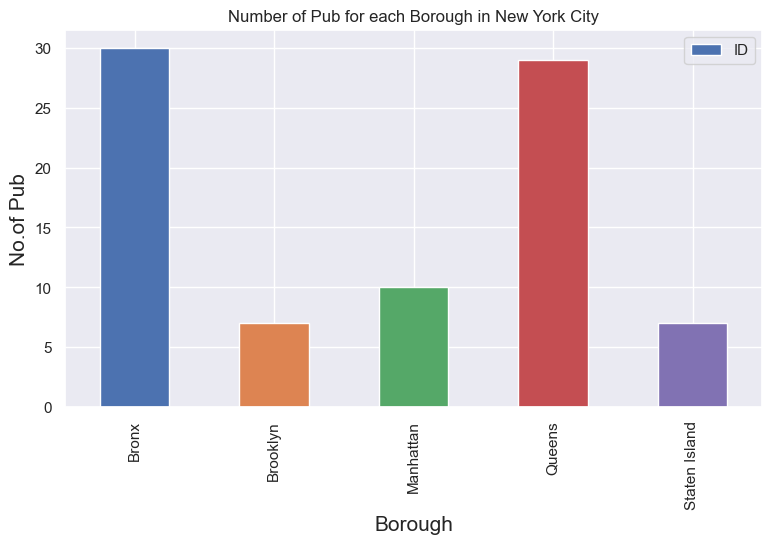

In [43]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Pub for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Pub', fontsize=15)
#giving a bar plot
pub_ny_csv.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## The Neighborhood has the most Pub

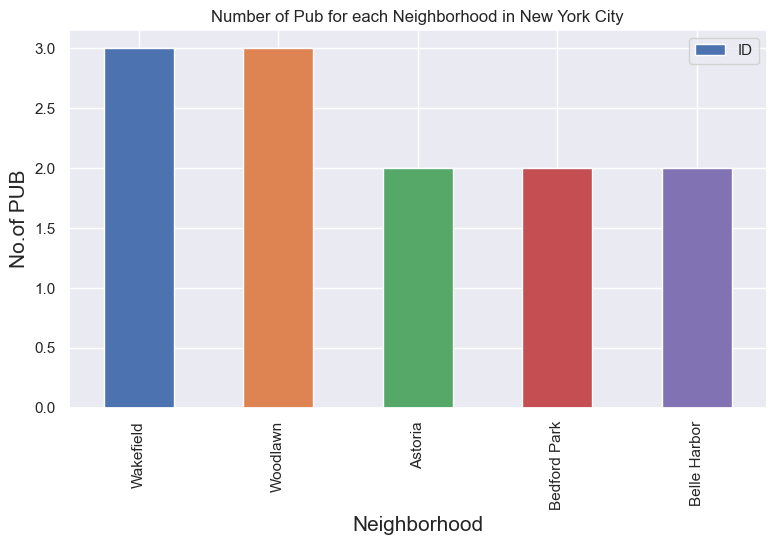

In [44]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Pub for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of PUB', fontsize=15)
#giving a bar plot
pub_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## check each pub (Rating, Tips, Like) from Foursquare API.

In [45]:
def get_venue_details(venue_id):
    #set variables
    CLIENT_ID = '2YZ3UDVZXAD4ODFRVNPW0FJ1D31LRWJH1RTFTH5GG0YNIQJE' # your Foursquare ID
    CLIENT_SECRET = 'ZM45XKPONM4XO2AYSNVNKCDZVC24QF1YRLZBVM32N52VDYKC' # your Foursquare Secret
    VERSION = '20200424' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [46]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
pub_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in pub_ny_csv.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(pub_ny_csv),')','processed')
    pub_stats_ny = pub_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID          Name  Likes  Rating  Tips
0  4bb24ac935f0c9b6a913bb83  The Heritage     49     8.6    17
( 1 / 83 ) processed
                         ID            Name  Likes  Rating  Tips
0  46212cb5f964a5208d451fe3  Rambling House     96     8.3    36
( 2 / 83 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4d4f16d29a2a6ea83b05296f  Moriarty's Bar & Restaurant      9     7.1     3
( 3 / 83 ) processed
                         ID              Name  Likes  Rating  Tips
0  59b17fe23b4e0043787e1a7c  The Bronx Public     12     8.5     6
( 4 / 83 ) processed
                         ID              Name  Likes  Rating  Tips
0  59b17fe23b4e0043787e1a7c  The Bronx Public     12     8.5     6
( 5 / 83 ) processed
                         ID              Name  Likes  Rating  Tips
0  59b17fe23b4e0043787e1a7c  The Bronx Public     12     8.5     6
( 6 / 83 ) processed
                         ID          Name  Likes  Rating  Ti

                         ID                             Name  Likes  Rating  \
0  4b566539f964a520970e28e3  Cobblestones Pub and Biergarten     50     7.4   

   Tips  
0    23  
( 54 / 83 ) processed
                         ID          Name  Likes  Rating  Tips
0  5bb00b1d35f983002c80ed81  The Skillman      6     8.0     1
( 55 / 83 ) processed
                         ID             Name  Likes  Rating  Tips
0  5716c77b498e4cbfa62d7e23  Peggy Dempsey's      9     8.1     2
( 56 / 83 ) processed
                         ID             Name  Likes  Rating  Tips
0  4b59ec78f964a5203ca128e3  Celtic Gasthaus     11     7.3     6
( 57 / 83 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4b720cfaf964a5202d6c2de3  Donovan's Grill & Tavern     66     7.1    43
( 58 / 83 ) processed
                         ID                               Name  Likes  Rating  \
0  4c74580cff1fb60c1c56f3a7  Rollin' Greens Irish Pub & Grille     19     7.5   

   Tips 

In [47]:
pub_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Wakefield,4bb24ac935f0c9b6a913bb83,The Heritage,49,8.6,17
1,Bronx,Wakefield,46212cb5f964a5208d451fe3,Rambling House,96,8.3,36
2,Bronx,Wakefield,4d4f16d29a2a6ea83b05296f,Moriarty's Bar & Restaurant,9,7.1,3
3,Bronx,Fieldston,59b17fe23b4e0043787e1a7c,The Bronx Public,12,8.5,6
4,Bronx,Riverdale,59b17fe23b4e0043787e1a7c,The Bronx Public,12,8.5,6


In [51]:
pub_stats_ny['Likes']=pub_stats_ny['Likes'].astype('float64')
pub_stats_ny['Tips']=pub_stats_ny['Tips'].astype('float64')

In [52]:
pub_stats_ny.iloc[pub_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood            Prospect Heights
ID              5670cfb8498ecfe4652095ce
Name                           Hartley's
Likes                                 87
Rating                               8.9
Tips                                  21
Name: 33, dtype: object

In [53]:
pub_stats_ny.iloc[pub_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood            Prospect Heights
ID              5670cfb8498ecfe4652095ce
Name                           Hartley's
Likes                                 87
Rating                               8.9
Tips                                  21
Name: 33, dtype: object

## Average rating of Pub for each neighborhood.

In [54]:
ny_neighborhood_stats=pub_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [55]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
37,Prospect Heights,8.90
17,Fort Greene,8.90
39,Ravenswood,8.65
56,Washington Heights,8.60
52,University Heights,8.60
1,Astoria,8.55
26,Marble Hill,8.55
20,Inwood,8.55
14,Fieldston,8.50
45,Spuyten Duyvil,8.50


## Average rating of Pub for each borough.

In [56]:
ny_borough_stats=pub_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [57]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.460000
1,Brooklyn,8.328571
0,Bronx,7.733333
3,Queens,7.062069
4,Staten Island,5.657143


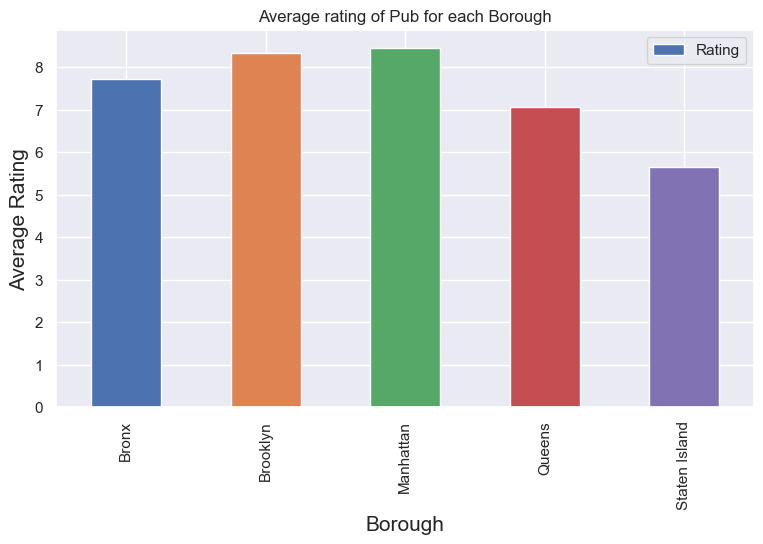

In [58]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Pub for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
pub_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## find the location of Pub has rating over 8.5

In [59]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]

In [60]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,neighborhoods, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.55
1,Brooklyn,Clinton Hill,40.693229,-73.967843,8.50
2,Bronx,Fieldston,40.895437,-73.905643,8.50
3,Brooklyn,Fort Greene,40.688527,-73.972906,8.90
4,Manhattan,Inwood,40.867684,-73.921210,8.55
5,Manhattan,Manhattan Valley,40.797307,-73.964286,8.50
6,Manhattan,Manhattanville,40.816934,-73.957385,8.50
7,Manhattan,Marble Hill,40.876551,-73.910660,8.55
8,Manhattan,Morningside Heights,40.808000,-73.963896,8.50
9,Brooklyn,Prospect Heights,40.676822,-73.964859,8.90


In [61]:
address='New York City, NY'
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [67]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
pub = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    pub.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [69]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(pub)